<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Logistic_regression_success_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import pandas as pd
import math
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

In [11]:
df = pd.read_csv('ex2data1.txt',header=None)

In [12]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [18]:
df.rename(columns={0: "First Exam"},inplace=True)
df.rename(columns={1: "Second Exam"},inplace=True)
df.rename(columns={2: "Result"},inplace=True)

In [97]:
df.head()

,First Exam,Second Exam,Result
0,34.623660,78.024693,0
62,56.253817,39.261473,0
44,51.047752,45.822701,0
27,93.114389,38.800670,0
32,52.107980,63.127624,0


In [94]:
df.sort_values(by=['Result'],inplace=True)

In [98]:
x = df[['First Exam','Second Exam']].to_numpy()

In [99]:
x[0:5]

array([[34.62365962, 78.02469282],
       [56.2538175 , 39.26147251],
       [51.04775177, 45.82270146],
       [93.1143888 , 38.80067034],
       [52.10797973, 63.12762377]])

In [100]:
x = StandardScaler().fit_transform(x)

In [101]:
y = df['Result'].to_numpy().reshape(-1,1)

In [102]:
y[0:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [103]:
num_features = 2

Text(0.5, 1.0, 'Result Distrubtion')

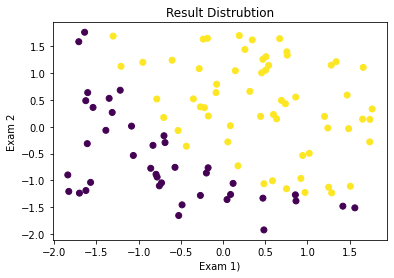

In [104]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.xlabel('Exam 1)')
plt.ylabel('Exam 2')
plt.title('Result Distrubtion')

In [105]:
def sigmoid(z):
  return 1/(1+math.e**(-z))

In [106]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

In [107]:
def predict(sample):
  result = 0.0
  for i in range(len(sample)):
    result = result + weights[i]*sample[i]

  result = result + bias
  return sigmoid(result)

In [108]:
def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0]*num_features
  db = 0.0

  global bias, weights

  m=len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample,predicted)

    dz = predicted - y_sample

    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

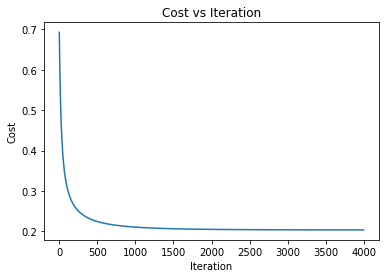

In [109]:
weights = [0.0]*num_features
bias = 0.0
learning_rate = 0.1
epochs = 4000

x_train_samples = x
y_train_samples = y

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples,y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Cost vs Iteration')
plt.show()

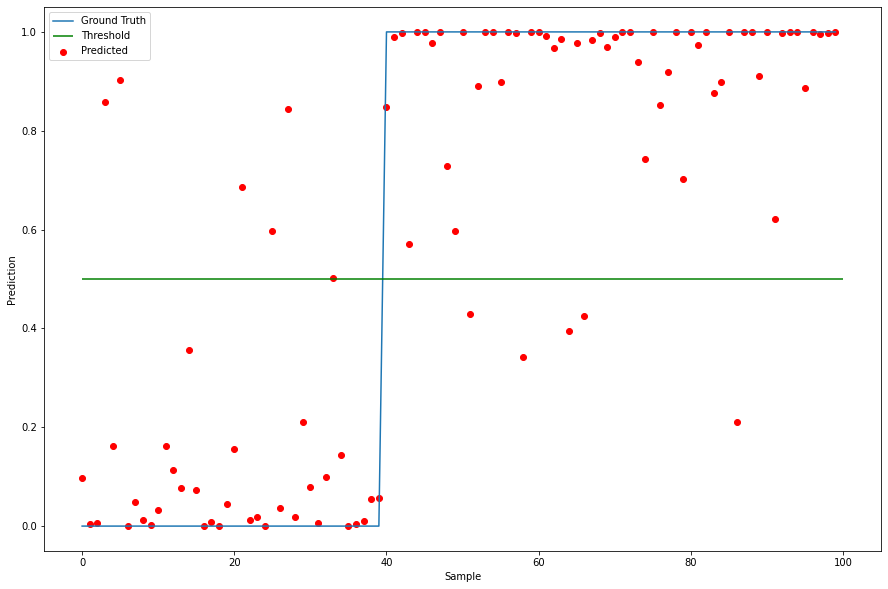

Accuracy: 89.00


In [110]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y[i]:
    correct = correct + 1

fig, ax = plt.subplots(figsize=(15, 10))

ax.hlines(0.5, 0, 100, colors="green", zorder=100, label='Threshold')
plt.scatter(range(m),predictions,label='Predicted',color='r')
plt.plot(range(m),y,label='Ground Truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: {:.2f}'.format(100*correct/m))